In [1]:
import os
import pickle
import numpy as np
from scipy import io
from mne import viz, stats
from matplotlib import colors, gridspec, pyplot as plt

In [2]:
CAF_DOSE = 200

SIGNIFICANT_P = 0.05
SIGNIFICANT_P_STRONG = 0.01
STRONG_SIGNIFICANCE_COLOR = [0.5, 0.5, 0.5]

PROJECT_PATH = '..\\data' # path to where the EEG sensor position file is stored
RESULTS_PATH = '..\\results'
FIGURE_PATH = '..\\figures'

STAGES = ['AWSL', 'NREM', 'REM']
BANDS = ['delta', 'theta', 'alpha', 'sigma', 'beta', 'low gamma']
CHANNELS = ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'P3 ', 'P4',
            'O1', 'O2 ', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'Oz']

In [3]:
# load EEG sensor positions to be used in the topomaps
sensor_pos = io.loadmat(os.path.join(PROJECT_PATH, 'Coo_caf'))['Cor'].T
sensor_pos = np.array([sensor_pos[1], sensor_pos[0]]).T

In [4]:
with open(os.path.join(RESULTS_PATH, 'difference', f'total{CAF_DOSE}.pickle'), 'rb') as file:
    diff = pickle.load(file)

#for stage in STAGES:
#    del diff[stage]['SpecPermEn']

In [5]:
'''
colormap = 'coolwarm'
small_font = 15
big_font = 20

for feature in diff[STAGES[0]].keys():
    vmin_mean = np.min([min(np.min(diff[stage][feature]['plac_mean']), np.min(diff[stage][feature]['caf_mean'])) for stage in STAGES])
    vmax_mean = np.max([max(np.max(diff[stage][feature]['plac_mean']), np.max(diff[stage][feature]['caf_mean'])) for stage in STAGES])
    vmin_mean = -max(abs(vmin_mean), abs(vmax_mean))
    vmax_mean = max(abs(vmin_mean), abs(vmax_mean))
    
    vmin_t = np.min([np.min(diff[stage][feature]['t_statistic']) for stage in STAGES])
    vmax_t = np.max([np.max(diff[stage][feature]['t_statistic']) for stage in STAGES])
    vmin_t = -max(abs(vmin_t), abs(vmax_t))
    vmax_t = max(abs(vmin_t), abs(vmax_t))
    
    plt.figure(figsize=(14, 8))
    suptitle = plt.suptitle(feature.replace('_', ' ').replace('SpecShanEn', 'SpecEn'), fontsize=big_font, y=1.05)
    
    subplot_counter = 0
    gs = gridspec.GridSpec(len(STAGES), 4, width_ratios=[0.01, 1, 1, 1])
    
    mean_cbar_axes = []
    t_cbar_axes = []
    
    for stage in STAGES:
        vmin_mean = min(np.min(diff[stage][feature]['plac_mean']), np.min(diff[stage][feature]['caf_mean']))
        vmax_mean = max(np.max(diff[stage][feature]['plac_mean']), np.max(diff[stage][feature]['caf_mean']))
        vmin_mean = -max(abs(vmin_mean), abs(vmax_mean))
        vmax_mean = max(abs(vmin_mean), abs(vmax_mean))
        
        # row annotation
        mean_cbar_axes.append(plt.subplot(gs[subplot_counter]))
        plt.annotate(stage.replace('AWSL', 'AWA'), xy=(0, 0.5), fontsize=small_font)
        plt.axis('off')
        subplot_counter += 1
        
        # placebo mean
        mean_cbar_axes.append(plt.subplot(gs[subplot_counter]))
        if stage == STAGES[0]:
            plt.title('placebo', fontsize=small_font)
        viz.plot_topomap(diff[stage][feature]['plac_mean'], sensor_pos, vmin=vmin_mean, vmax=vmax_mean, cmap=colormap, contours=False, show=False)
        subplot_counter += 1
        
        # caffeine mean
        mean_cbar_axes.append(plt.subplot(gs[subplot_counter]))
        if stage == STAGES[0]:
            plt.title('caffeine', fontsize=small_font)
        viz.plot_topomap(diff[stage][feature]['caf_mean'], sensor_pos, vmin=vmin_mean, vmax=vmax_mean, cmap=colormap, contours=False, show=False)
        subplot_counter += 1
        
        # caffeine - placebo t-statistic
        t_cbar_axes.append(plt.subplot(gs[subplot_counter]))
        if stage == STAGES[0]:
            plt.title('caffeine - placebo', fontsize=small_font)
        mask = diff[stage][feature]['p_value'] < SIGNIFICANT_P
        viz.plot_topomap(diff[stage][feature]['t_statistic'], sensor_pos, mask=mask, vmin=vmin_t, vmax=vmax_t, mask_params={'markersize': 6}, cmap=colormap, contours=False, show=False)
        subplot_counter += 1
    
    # mean colorbar
    norm = colors.Normalize(vmin=vmin_mean, vmax=vmax_mean)
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=mean_cbar_axes, shrink=1, aspect=20)
    
    # t-statistics colorbar
    norm = colors.Normalize(vmin=vmin_t, vmax=vmax_t)
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=t_cbar_axes, shrink=1, aspect=22)
    
    plt.savefig(os.path.join(FIGURE_PATH, f'difference{CAF_DOSE}', f'{feature}'), bbox_inches='tight', bbox_extra_artists=[suptitle])
    plt.show()
'''

"\ncolormap = 'coolwarm'\nsmall_font = 15\nbig_font = 20\n\nfor feature in diff[STAGES[0]].keys():\n    vmin_mean = np.min([min(np.min(diff[stage][feature]['plac_mean']), np.min(diff[stage][feature]['caf_mean'])) for stage in STAGES])\n    vmax_mean = np.max([max(np.max(diff[stage][feature]['plac_mean']), np.max(diff[stage][feature]['caf_mean'])) for stage in STAGES])\n    vmin_mean = -max(abs(vmin_mean), abs(vmax_mean))\n    vmax_mean = max(abs(vmin_mean), abs(vmax_mean))\n    \n    vmin_t = np.min([np.min(diff[stage][feature]['t_statistic']) for stage in STAGES])\n    vmax_t = np.max([np.max(diff[stage][feature]['t_statistic']) for stage in STAGES])\n    vmin_t = -max(abs(vmin_t), abs(vmax_t))\n    vmax_t = max(abs(vmin_t), abs(vmax_t))\n    \n    plt.figure(figsize=(14, 8))\n    suptitle = plt.suptitle(feature.replace('_', ' ').replace('SpecShanEn', 'SpecEn'), fontsize=big_font, y=1.05)\n    \n    subplot_counter = 0\n    gs = gridspec.GridSpec(len(STAGES), 4, width_ratios=[0.01, 1,

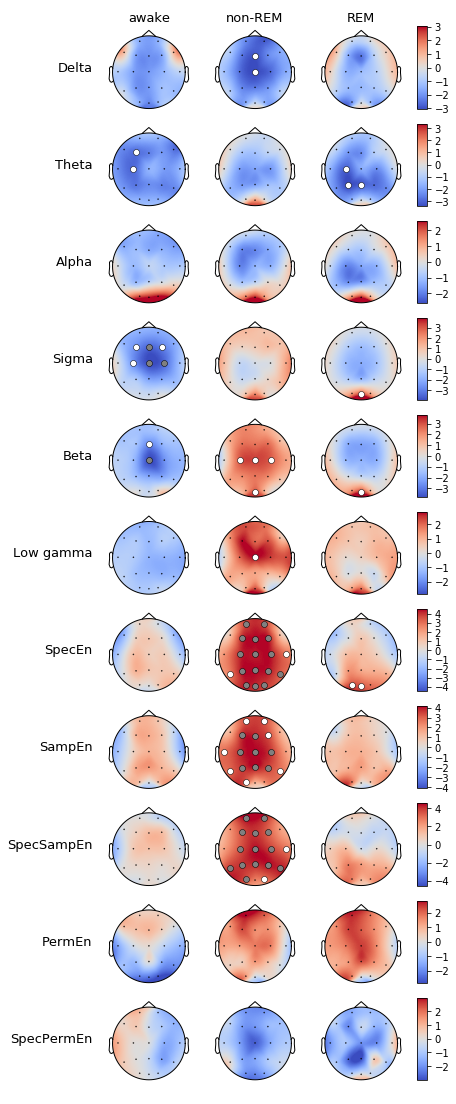

In [6]:
fontsize_small = 13
fontsize_big = 20
colormap = 'coolwarm'

width = len(STAGES)
height = len(diff[STAGES[0]])

# create gridspec
gs = gridspec.GridSpec(height + 1,
                       width + 2,
                       width_ratios=[0.001] + [1] * width + [0.1],
                       height_ratios=[0.01] + [1] * height,
                       wspace=0.1)
subplot_counter = 1
plt.figure(figsize=(6, 18))

# add stage annotations
for stage in STAGES:
    plt.subplot(gs[subplot_counter])
    subplot_counter += 1
    plt.annotate(stage.replace('AWSL', 'awake').replace('NREM', 'non-REM'),
                 xy=(0.5, 0),
                 ha='center',
                 va='top',
                 fontsize=fontsize_small)
    plt.axis('off')
subplot_counter += 1

feature_labels = []
for feature in diff[STAGES[0]].keys():
    # add feature annotations
    plt.subplot(gs[subplot_counter])
    subplot_counter += 1
    
    name = feature.replace('PSD_', '').replace('SpecShanEn', 'SpecEn')
    if not name.endswith('En'):
        name = name.capitalize()
    feature_labels.append(plt.annotate(name, xy=(1, 0.5), ha='right', va='center', fontsize=fontsize_small))
    plt.axis('off')
    
    # get min and max values for plots and colorbars
    vmin = np.min([np.min(diff[stage][feature]['t_statistic']) for stage in STAGES])
    vmax = np.max([np.max(diff[stage][feature]['t_statistic']) for stage in STAGES])
    absolute = max(abs(vmin), abs(vmax))
    vmin = -absolute
    vmax = absolute

    axes = []
    for stage in STAGES:
        axes.append(plt.subplot(gs[subplot_counter]))
        subplot_counter += 1
        
        # get significance marker params
        mask = diff[stage][feature]['p_value'] < SIGNIFICANT_P
        marker_colors = ['w'] * len(mask)
        for i in np.where(diff[stage][feature]['p_value'] < SIGNIFICANT_P_STRONG)[0]:
            marker_colors[i] = STRONG_SIGNIFICANCE_COLOR
        marker_colors = np.array(marker_colors)[mask]
        
        # plot topomaps
        viz.plot_topomap(diff[stage][feature]['t_statistic'],
                         sensor_pos,
                         mask=mask,
                         vmin=vmin,
                         vmax=vmax,
                         mask_params={'markersize': 6, 'markeredgewidth': 0.5, 'markerfacecolor': marker_colors},
                         cmap=colormap,
                         contours=False,
                         show=False)
    
    # add colorbar
    norm = colors.Normalize(vmin=vmin,vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, cax=plt.subplot(gs[subplot_counter]))
    subplot_counter += 1
    
plt.savefig(os.path.join(FIGURE_PATH, 'difference-topomaps'),
            bbox_inches='tight',
            bbox_extra_artists=feature_labels,
            dpi=400)
plt.show()